In [1]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def read_dataframes(file_pattern):
    return pd.concat([pd.read_csv(file) for file in glob.glob(file_pattern)], sort=False)


def aggregate_score(dataframe, func, name_column='Name'):
    return dataframe.groupby(name_column).agg(func).reset_index()


In [3]:
output_dir = 'config05'
dir_path = 'outputs/' + output_dir +'/'

df = read_dataframes(f'{dir_path}*.csv')
df_mean = aggregate_score(df, np.mean)
df_std = aggregate_score(df, np.std)

In [4]:
df.head()

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
0,0.999214,12911.51,0.736842,CI-LogisticRegression,0.875000,0.636364,0.465430
1,0.998952,12608.12,0.691358,CI-DecisionTree,0.704403,0.678788,0.477991
2,0.999392,10002.77,0.804054,CI-RandomForest,0.908397,0.721212,0.585860
3,0.999392,9875.34,0.810458,CI-XGBoost,0.879433,0.751515,0.591136
4,0.672836,40940.41,0.005226,CST-CostSensitiveLogisticRegression,0.002627,0.496970,-0.695038


In [5]:
df_mean.head()

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.999097,7433.4356,0.738904,0.739747,0.738909,0.639079
1,CI-DecisionTree-BMR,0.996794,7465.3046,0.326119,0.264723,0.436606,0.637010
2,CI-DecisionTree-TO,0.999097,7433.4356,0.738904,0.739747,0.738909,0.639079
3,CI-LogisticRegression,0.999184,10467.7204,0.724999,0.868134,0.623879,0.493001
4,CI-LogisticRegression-BMR,0.995366,4244.9220,0.284985,0.202045,0.510303,0.795307


In [6]:
results = pd.DataFrame(df_mean.Name.str.split('-').values.tolist(), columns=['Model class', 'Model', 'Extra model'])
results = pd.concat([df_mean, results], axis = 1)
results = results.drop(['Name'], axis = 1)

In [7]:
results.sort_values('Savings')

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
13,0.478834,59326.6766,0.004588,0.002310,0.569818,-1.937926,CST,CostSensitiveLogisticRegression,None
3,0.999184,10467.7204,0.724999,0.868134,0.623879,0.493001,CI,LogisticRegression,None
1,0.996794,7465.3046,0.326119,0.264723,0.436606,0.637010,CI,DecisionTree,BMR
0,0.999097,7433.4356,0.738904,0.739747,0.738909,0.639079,CI,DecisionTree,None
2,0.999097,7433.4356,0.738904,0.739747,0.738909,0.639079,CI,DecisionTree,TO
6,0.999471,6804.6462,0.829949,0.932926,0.748242,0.671581,CI,RandomForest,None
9,0.999492,6543.4650,0.840999,0.917360,0.777333,0.684115,CI,XGBoost,None
12,0.999157,6443.8956,0.731558,0.814127,0.665697,0.686303,CST,CostSensitiveDecisionTreeClassifier,None
5,0.996554,5964.5606,0.598849,0.546779,0.810788,0.708862,CI,LogisticRegression,TO
8,0.997186,5230.4788,0.560682,0.476122,0.834061,0.747367,CI,RandomForest,TO


In [8]:
results.sort_values(['Model', 'Savings'])

,Accuracy,Cost,F1,Precision,Recall,Savings,Model class,Model,Extra model
12,0.999157,6443.8956,0.731558,0.814127,0.665697,0.686303,CST,CostSensitiveDecisionTreeClassifier,None
13,0.478834,59326.6766,0.004588,0.002310,0.569818,-1.937926,CST,CostSensitiveLogisticRegression,None
1,0.996794,7465.3046,0.326119,0.264723,0.436606,0.637010,CI,DecisionTree,BMR
0,0.999097,7433.4356,0.738904,0.739747,0.738909,0.639079,CI,DecisionTree,None
2,0.999097,7433.4356,0.738904,0.739747,0.738909,0.639079,CI,DecisionTree,TO
3,0.999184,10467.7204,0.724999,0.868134,0.623879,0.493001,CI,LogisticRegression,None
5,0.996554,5964.5606,0.598849,0.546779,0.810788,0.708862,CI,LogisticRegression,TO
4,0.995366,4244.9220,0.284985,0.202045,0.510303,0.795307,CI,LogisticRegression,BMR
6,0.999471,6804.6462,0.829949,0.932926,0.748242,0.671581,CI,RandomForest,None
8,0.997186,5230.4788,0.560682,0.476122,0.834061,0.747367,CI,RandomForest,TO


In [9]:
df_std

,Name,Accuracy,Cost,F1,Precision,Recall,Savings
0,CI-DecisionTree,0.000108,1990.032915,0.030461,0.034780,0.035505,0.072402
1,CI-DecisionTree-BMR,0.000694,1995.609804,0.049532,0.059263,0.036260,0.073665
2,CI-DecisionTree-TO,0.000108,1990.032915,0.030461,0.034780,0.035505,0.072402
3,CI-LogisticRegression,0.000064,2571.473043,0.027487,0.025677,0.041003,0.083434
4,CI-LogisticRegression-BMR,0.001210,1576.309207,0.051401,0.053211,0.032649,0.063810
5,CI-LogisticRegression-TO,0.005242,1903.338154,0.213685,0.269276,0.065553,0.086736
6,CI-RandomForest,0.000062,2157.974653,0.021619,0.023588,0.031793,0.080581
7,CI-RandomForest-BMR,0.000633,1530.635371,0.075113,0.123673,0.032608,0.062613
8,CI-RandomForest-TO,0.001634,1799.589283,0.184551,0.267194,0.048079,0.071763
9,CI-XGBoost,0.000061,1967.161279,0.020120,0.027296,0.030753,0.072058


In [10]:
df.sort_values(['Name', 'Savings'])

,Accuracy,Cost,F1,Name,Precision,Recall,Savings
1,0.998899,12716.11,0.702550,CI-DecisionTree,0.659574,0.751515,0.445099
1,0.998952,12608.12,0.691358,CI-DecisionTree,0.704403,0.678788,0.477991
1,0.998879,9645.40,0.691643,CI-DecisionTree,0.659341,0.727273,0.512896
1,0.999057,7598.66,0.718750,CI-DecisionTree,0.741935,0.696970,0.532959
1,0.999004,8844.97,0.709480,CI-DecisionTree,0.716049,0.703030,0.537537
1,0.998931,9654.06,0.692771,CI-DecisionTree,0.688623,0.696970,0.542094
1,0.999099,8539.91,0.732919,CI-DecisionTree,0.751592,0.715152,0.561852
1,0.999046,11337.43,0.716511,CI-DecisionTree,0.737179,0.696970,0.564857
1,0.998973,8147.72,0.706587,CI-DecisionTree,0.698225,0.715152,0.569786
1,0.999182,8388.38,0.760736,CI-DecisionTree,0.770186,0.751515,0.574731


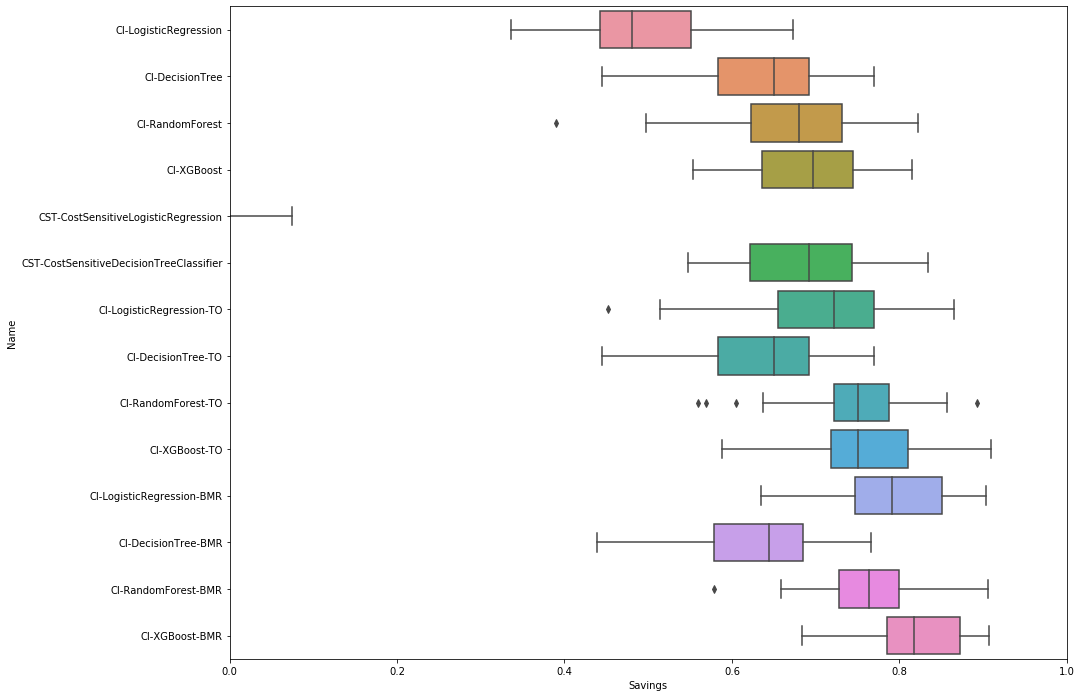

In [11]:
data = df #[df['Savings'] > 0]

fig, ax = plt.subplots(figsize = (15, 12))

sns.boxplot(x = 'Savings', y = 'Name', data = data, ax = ax)
ax.set_xlim([0, 1])
plt.show()